In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
filenames = ['kowalska_gamma.csv', 'kowalska_high_energy_protons.csv', 'kowalska_sobp_protons.csv']

In [10]:
pd_gamma = pd.read_csv(filenames[0])
pd_high_energy_protons = pd.read_csv(filenames[1])
pd_sobp_protons = pd.read_csv(filenames[2])

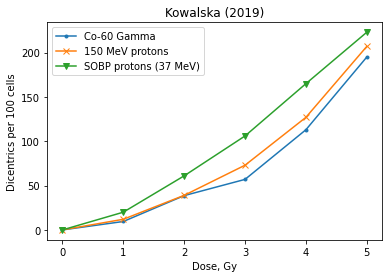

In [24]:
plt.plot(pd_gamma.iloc[:,0], pd_gamma.iloc[:,2], marker='.', label='Co-60 Gamma')
plt.plot(pd_high_energy_protons.iloc[:,0], pd_high_energy_protons.iloc[:,2], marker='x', label='150 MeV protons')
plt.plot(pd_sobp_protons.iloc[:,0], pd_sobp_protons.iloc[:,2], marker='v', label='SOBP protons (37 MeV)')
plt.xlabel('Dose, Gy')
plt.ylabel('Dicentrics per 100 cells')
plt.title('Kowalska (2019)')
plt.legend()